# Managing Scientific Data Outputs with OutputSaver

### Content


0. [Example of Automated Filename Generation with OutputSaver](#0-example-of-automated-filename-generation-with-outputsaver)

1. [Saving and Managing NetCDF Data with OutputSaver](#1-saving-and-managing-netcdf-data-with-outputsaver)

2. [Saving PDF and PNG Plots to Memory with Metadata](#2-saving-pdf-and-png-plots-to-memory-with-metadata)

### 0. Example of Automated Filename Generation with OutputSaver

In [1]:
from aqua.util import OutputSaver

#### Setting Up the OutputSaver Instance

The cell below initializes an OutputSaver class instance with the specified parameters: diagnostic name, model, experiment, log level, and default path. This instance will be used for generating descriptive filenames for the output files.

By default, the catalog used for generating filenames is determined by the system configuration. If the default catalog was set using the `aqua set <catalog>` function in a scenario with multiple catalogs, then the specified catalog name would appear at the top of the list in `.aqua/config-aqua.yaml`. If the default catalog is not explicitly set, the first catalog listed in the file will be used as the default.


In [2]:
names = OutputSaver(diagnostic='tropical_rainfall', model='MSWEP', exp='past', loglevel='DEBUG', default_path='.')

Generate a filename for a NetCDF file reflecting the mean diagnostic product of the tropical rainfall analysis, utilizing the previously configured parameters of the OutputSaver instance.

In [3]:
names.generate_name(diagnostic_product='mean', suffix='nc')

2024-07-10 02:48:32 :: OutputSaver :: DEBUG    -> Generated filename: tropical_rainfall.mean.MSWEP.past.lumi-phase1.nc


'tropical_rainfall.mean.MSWEP.past.lumi-phase1.nc'

#### Generating a Filename for a NetCDF File with a Different Catalog

This cell demonstrates how to initialize the OutputSaver class instance with a specified catalog

In [4]:
names_with_catalog = OutputSaver(diagnostic='tropical_rainfall', model='MSWEP', exp='past', catalog='lumi-phase2',
                                 loglevel='DEBUG', default_path='.')

Generate a filename for a NetCDF file reflecting the mean diagnostic product of the tropical rainfall analysis, utilizing the parameters of the OutputSaver instance with the specified catalog

In [5]:
names_with_catalog.generate_name(diagnostic_product='mean', suffix='nc')

2024-07-10 02:48:32 :: OutputSaver :: DEBUG    -> Generated filename: tropical_rainfall.mean.MSWEP.past.lumi-phase2.nc


'tropical_rainfall.mean.MSWEP.past.lumi-phase2.nc'

#### Generating a Filename for a Comparative NetCDF File

Generate a filename for a NetCDF file comparing the original model (MSWEP) and experiment (past) with a second model (ERA5) and its experiment (era5), using the established naming conventions of the OutputSaver instance.

In [6]:
names_with_catalog.generate_name(model_2='ERA5', exp_2='era5', time_start='1990-01-10', time_end='1990-02-13',
                                 time_precision='ym', area='indian_ocean')

2024-07-10 02:48:33 :: OutputSaver :: DEBUG    -> Generated filename: tropical_rainfall.mean.MSWEP.past.lumi-phase2.ERA5.era5.indian_ocean.199001.199002.nc


'tropical_rainfall.mean.MSWEP.past.lumi-phase2.ERA5.era5.indian_ocean.199001.199002.nc'

#### Generating a Filename for Precipitation Data Comparison
Generate a filename for a NetCDF file, detailing the mean total precipitation rate over the Indian Ocean from January to February 1990, comparing outputs from two models: MSWEP and ERA5.

In [7]:
names.generate_name(var='mtpr', model_2='ERA5', exp_2='era5', time_start='1990-01', time_end='1990-02',
                    time_precision='ym', area='indian_ocean')

2024-07-10 02:48:33 :: OutputSaver :: DEBUG    -> Generated filename: tropical_rainfall.mean.mtpr.MSWEP.past.lumi-phase1.ERA5.era5.indian_ocean.199001.199002.nc


'tropical_rainfall.mean.mtpr.MSWEP.past.lumi-phase1.ERA5.era5.indian_ocean.199001.199002.nc'

#### Generating a Filename with Additional Specifications

Generate a filename for a NetCDF file, incorporating the mean diagnostic product with additional specifications for resolution and status.

In [8]:
names.generate_name(diagnostic_product='mean', suffix='nc', resolution="1km", status="preliminary")

2024-07-10 02:48:33 :: OutputSaver :: DEBUG    -> Generated filename: tropical_rainfall.mean.MSWEP.past.lumi-phase1.resolution_1km.status_preliminary.nc


'tropical_rainfall.mean.MSWEP.past.lumi-phase1.resolution_1km.status_preliminary.nc'

#### Generating a Filename with Time Intervals and Additional Attributes
Generate a filename with detailed time intervals and additional dataset attributes such as measurement frequency and status, demonstrating the OutputSaver class's capability to produce comprehensive and precise filenames.

In [9]:
names.generate_name(var='mtpr', model_2='ERA5', exp_2='era5', time_start='1990-01', time_end='1990-02',
                    time_precision='ym', area='indian_ocean', frequency="3H", status="preliminary")

2024-07-10 02:48:33 :: OutputSaver :: DEBUG    -> Generated filename: tropical_rainfall.mean.mtpr.MSWEP.past.lumi-phase1.ERA5.era5.indian_ocean.199001.199002.frequency_3H.status_preliminary.nc


'tropical_rainfall.mean.mtpr.MSWEP.past.lumi-phase1.ERA5.era5.indian_ocean.199001.199002.frequency_3H.status_preliminary.nc'

### 1. Saving and Managing NetCDF Data with OutputSaver

This section demonstrates how to read data, produce diagnostic objects, and save NetCDF files using the OutputSaver class, while incorporating metadata for better file management.

#### Reading the Data
First, we need to read the data using the Reader class from the aqua module.

In [10]:
from aqua import Reader
reader  = Reader(model="IFS-NEMO", exp="historical-1990", source="lra-r100-monthly") 
ifs_1990 = reader.retrieve(var=["mtpr"])

2024-07-10 02:48:33 :: Reader :: WARNING  -> LRA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/LRA
2024-07-10 02:48:33 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default /appl/local/climatedt
2024-07-10 02:48:33 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default /projappl/project_465000454/jvonhar/aqua/eccodes
2024-07-10 02:48:33 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-07-10 02:48:33 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly


This cell reads the precipitation data (mtpr) for the IFS-NEMO model and the historical-1990 experiment.

#### Producing the Diagnostic Object (Histogram)
Next, we produce a diagnostic object, in this case, a histogram, using the Tropical_Rainfall class.

In [11]:
from tropical_rainfall import Tropical_Rainfall
diag = Tropical_Rainfall(loglevel='warning')
# producing the netcdf output
hist_data = diag.histogram(ifs_1990,  save=False)

This cell initializes the Tropical_Rainfall diagnostic object and produces histogram data from the retrieved precipitation data.

#### Initializing the OutputSaver Class
Initialize the OutputSaver class to manage output file naming.

In [12]:
from aqua.util import OutputSaver
from aqua.util import open_image

# Setting the default path for saving files
default_path = "./"
names = OutputSaver(diagnostic='tropical_rainfall', model='IFS-NEMO', exp='historical-1990', loglevel='DEBUG', default_path=default_path)

This cell initializes the OutputSaver class instance with the specified parameters, setting up the default path for saving output files.

#### Saving the NetCDF Data

We will now save the NetCDF data to the specified path and include metadata for better file organization.

In [13]:
# Defining metadata for the NetCDF file
metadata = {
    'title': 'Testing the saving of NetCDF files',
    'author': 'OutputSaver',
    'history': 'Created on a Jupyter Notebook',
    'description': 'Demonstrating netCDF Metadata Addition',
    'institution': 'Politecnico di Torino',
    'source': 'IFS-NEMO',
}
# Save the netCDF to the specified path with the metadata
saved_file_path = names.save_netcdf(hist_data, path=default_path, diagnostic_product='histogram', metadata=metadata)
# Print the path where the netCDF file has been saved
print(f"netCDF with metadata saved to: {saved_file_path}")

2024-07-10 02:48:57 :: OutputSaver :: DEBUG    -> Generated filename: tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.nc
2024-07-10 02:48:57 :: OutputSaver :: DEBUG    -> Metadata added: {'title': 'Testing the saving of NetCDF files', 'author': 'OutputSaver', 'description': 'Demonstrating netCDF Metadata Addition', 'institution': 'Politecnico di Torino', 'source': 'IFS-NEMO', 'date_saved': '2024-07-10 02:48:57'}
2024-07-10 02:48:57 :: OutputSaver :: INFO     -> Saved netCDF file to path: ./tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.nc


netCDF with metadata saved to: ./tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.nc


Note: By default, the OutputSaver class will always add a metadata field date_saved which records the date and time the file was saved.

#### Opening the Saved Data and Checking the Metadata

Finally, we open the saved NetCDF file and check its metadata to ensure it was saved correctly.



In [14]:
import xarray as xr
xr.open_dataset('tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.nc')

<xarray.Dataset> Size: 240kB
Dimensions:        (center_of_bin: 5000)
Coordinates:
  * center_of_bin  (center_of_bin) float64 40kB 0.25 0.75 ... 2.499e+03 2.5e+03
    width          (center_of_bin) float64 40kB ...
Data variables:
    counts         (center_of_bin) float64 40kB ...
    frequency      (center_of_bin) float64 40kB ...
    pdf            (center_of_bin) float64 40kB ...
    pdfP           (center_of_bin) float64 40kB ...
Attributes: (12/15)
    history:                \n2024-07-10 02:48:49 AQUA💧: Retrieved from IFS-N...
    time_band:              1990-01-01T00:00:00.000000000, 2002-02-01T00:00:0...
    lat_band:               -14.5, 14.5, freq=1.0
    lon_band:               0.0, 359.0, freq=1.0
    time_band_history:      1990-01-01T00:00:00.000000000, 2002-02-01T00:00:0...
    units:                  mm/day
    ...                     ...
    title:                  Testing the saving of NetCDF files
    author:                 OutputSaver
    description:            Demonstrating netCDF Metadata Addition
    institution:            Politecnico di Torino
    source:                 IFS-NEMO
    date_saved:             2024-07-10 02:48:57

### 2. Saving PDF and PNG Plots to Memory with Metadata
This section demonstrates how to generate plots, save them as PDF and PNG files with metadata, and display them using the OutputSaver class.

#### Generating and Saving a PDF Plot with Metadata
First, we generate a histogram plot and save it as a PDF file with metadata.

2024-07-10 02:48:59 :: OutputSaver :: DEBUG    -> Generated filename: tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.pdf
2024-07-10 02:49:00 :: add_pdf_metadata :: DEBUG    -> Keeping old metadata
2024-07-10 02:49:00 :: OutputSaver :: INFO     -> Saved PDF file at: ./tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.pdf


PDF saved to: ./tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.pdf


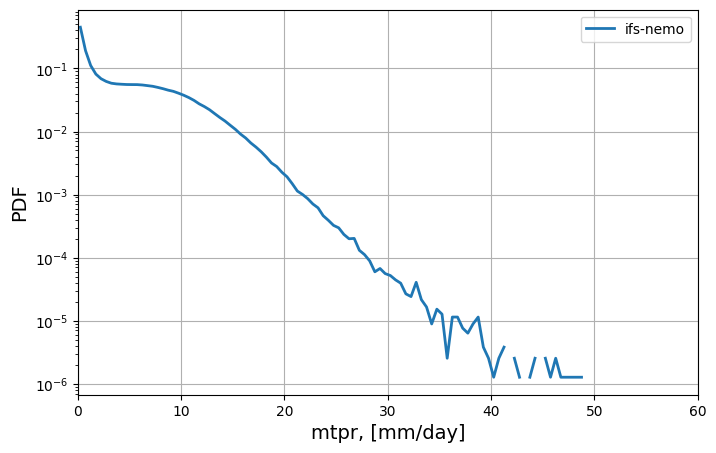

In [15]:
# Generate the histogram plot
figure, _ = diag.histogram_plot(hist_data, figsize=1, pdf=True, smooth=True, save=False, 
                                xlogscale=False, ylogscale=True, color='tab:blue',
                                loc='upper right', xmax=60, legend='ifs-nemo')

# Define metadata for the PDF file
metadata = {
    '/Title': 'Sample PDF',
    '/Author': 'OutputSaver',
    '/Subject': 'Demonstrating PDF Metadata Addition',
    '/Keywords': 'PDF, OutputSaver, Metadata'
}

# Extract the figure and axis objects
fig, ax = figure 

# Save the PDF with metadata
pdf_path = names.save_pdf(fig, diagnostic_product='histogram', metadata=metadata, dpi=300)
print(f"PDF saved to: {pdf_path}")


#### Opening and Displaying the Saved PDF File
Provide a link to the saved PDF file for easy access:

In [16]:
open_image("tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.pdf")

PDF Metadata:
/Producer: Matplotlib pdf backend v3.9.1
/Creator: Matplotlib v3.9.1, https://matplotlib.org
/CreationDate: D:20240710024859+03'00'
/Description: {'/Title': 'Sample PDF', '/Author': 'OutputSaver', '/Subject': 'Demonstrating PDF Metadata Addition', '/Keywords': 'PDF, OutputSaver, Metadata', 'date_saved': '2024-07-10 02:49:00'}


/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/notebooks/tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.pdf

#### Generating and Saving a PNG Plot with Metadata
Next, we generate the same histogram plot and save it as a PNG file with metadata.

2024-07-10 02:49:01 :: OutputSaver :: DEBUG    -> Generated filename: tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.png
2024-07-10 02:49:02 :: add_png_metadata :: DEBUG    -> Adding metadata: Title = Sample PNG
2024-07-10 02:49:02 :: add_png_metadata :: DEBUG    -> Adding metadata: Author = OutputSaver
2024-07-10 02:49:02 :: add_png_metadata :: DEBUG    -> Adding metadata: Description = Demonstrating PNG Metadata Addition
2024-07-10 02:49:02 :: add_png_metadata :: DEBUG    -> Adding metadata: Keywords = PNG, OutputSaver, Metadata
2024-07-10 02:49:02 :: add_png_metadata :: DEBUG    -> Adding metadata: date_saved = 2024-07-10 02:49:02
2024-07-10 02:49:02 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.png
2024-07-10 02:49:02 :: OutputSaver :: INFO     -> Saved PNG file to path: ./tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.png


PNG saved to: ./tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.png


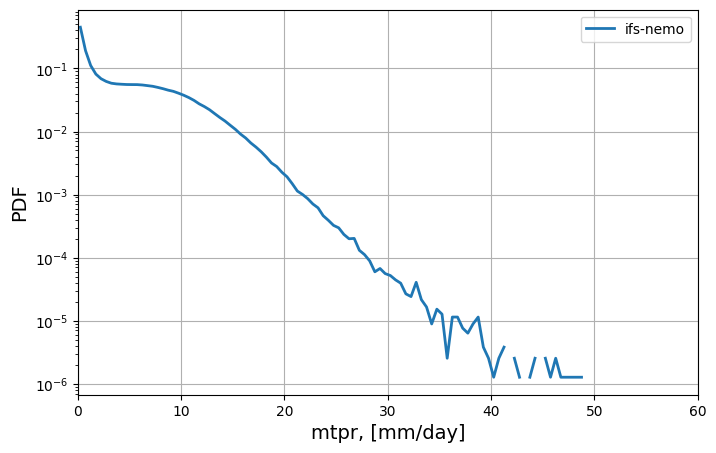

In [17]:
# Generate the histogram plot
figure, _ = diag.histogram_plot(hist_data, figsize=1, pdf=True, save=False, smooth=True,
                                xlogscale=False, ylogscale=True, color='tab:blue',
                                loc='upper right', xmax=60, legend='ifs-nemo')

# Define metadata for the PNG file
metadata = {
    "Title": "Sample PNG",
    "Author": "OutputSaver",
    "Description": "Demonstrating PNG Metadata Addition",
    "Keywords": "PNG, OutputSaver, Metadata"
}

# Extract the figure and axis objects
fig, ax = figure 

# Save the PNG with metadata
png_path = names.save_png(fig, diagnostic_product='histogram', metadata=metadata, dpi=300)
print(f"PNG saved to: {png_path}")


#### Opening and Displaying the Saved PNG File
Provide a link to the saved PDF file for easy access:


In [18]:
open_image("tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.png")

PNG Metadata:
Title: Sample PNG
Author: OutputSaver
Description: Demonstrating PNG Metadata Addition
Keywords: PNG, OutputSaver, Metadata
date_saved: 2024-07-10 02:49:02


/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/notebooks/tropical_rainfall.histogram.IFS-NEMO.historical-1990.lumi-phase1.png